# Introduction to spacy

- At the center of spaCy is the object containing the processing pipeline. We usually call this variable "nlp".

- For example, to create an English nlp object, you can import spacy and use the spacy.blank method to create a blank English pipeline. You can use the nlp object like a function to analyze text.

- It contains all the different components in the pipeline.

- It also includes language-specific rules used for tokenizing the text into words and punctuation. spaCy supports a variety of languages.


In [1]:
import spacy

nlp = spacy.blank('en')

- When you process a text with the nlp object, spaCy creates a Doc object – short for "document". The Doc lets you access information about the text in a structured way, and no information is lost.

- The Doc behaves like a normal Python sequence by the way and lets you iterate over its tokens, or get a token by its index. But more on that later!


In [2]:
doc = nlp('Hello, world!')

for token in doc:
    print(token.text)

Hello
,
world
!


there's an important distinction:

- `token.text` returns a string  

- `token` without .text is still a Token object that gets converted to a string when printed

You can see this difference if you check the types:

In [3]:
for token in doc:
    print(f"token: {token} (type: {type(token)})")
    print(f"token.text: {token.text} (type: {type(token.text)})")
    print("----")

token: Hello (type: <class 'spacy.tokens.token.Token'>)
token.text: Hello (type: <class 'str'>)
----
token: , (type: <class 'spacy.tokens.token.Token'>)
token.text: , (type: <class 'str'>)
----
token: world (type: <class 'spacy.tokens.token.Token'>)
token.text: world (type: <class 'str'>)
----
token: ! (type: <class 'spacy.tokens.token.Token'>)
token.text: ! (type: <class 'str'>)
----


## The Token Object

- `Token` objects represent the tokens in a document – for example, a word or a punctuation character.

- To get a token at a specific position, you can index into the doc.

- `Token` objects also provide various attributes that let you access more information about the tokens. For example, the .text attribute returns the verbatim token text.


In [4]:
token = doc[2]

print(token.text)

world


## The Span Object

- A `Span` object is a slice of the document consisting of one or more tokens. It's only a view of the `Doc` and doesn't contain any data itself.

- To create a span, you can use Python's slice notation. For example, `1:3` will create a slice starting from the token at position 1, up to – but not including! – the token at position 3.


In [5]:
span = doc[1:3]

print(span.text)

, world


Here you can see some of the available token attributes:

- `i` is the index of the token within the parent document.

- `text` returns the token text.

- `is_alpha`, `is_punct` and `like_num` return boolean values indicating whether the token consists of alphabetic characters, whether it's punctuation or whether it resembles a number. For example, a token "10" – one, zero – or the word "ten" – T, E, N.

- These attributes are also called lexical attributes: they refer to the entry in the vocabulary and don't depend on the token's context.


In [6]:
doc = nlp('It costs $5')

print("Index: ", [token.i for token in doc])
print("Text: ", [token.text for token in doc])

print("is_alpha: ", [token.is_alpha for token in doc])
print("is_punct: ", [token.is_punct for token in doc])
print("like_num: ", [token.like_num for token in doc])

Index:  [0, 1, 2, 3]
Text:  ['It', 'costs', '$', '5']
is_alpha:  [True, True, False, False]
is_punct:  [False, False, False, False]
like_num:  [False, False, False, True]


## Trained pipelines


- Models that enable spaCy to predict linguistic attributes in context
    - Part-of-speech tags
    - Syntactic dependencies
    - Named entities
    
- Trained on labeled example texts
- Can be updated with more examples to fine-tune predictions


- Some of the most interesting things you can analyze are context-specific: for example, whether a word is a verb or whether a span of text is a person name.

- Trained pipeline components have statistical models that enable spaCy to make predictions in context. This usually includes part-of speech tags, syntactic dependencies and named entities.

- Pipelines are trained on large datasets of labeled example texts.

- They can be updated with more examples to fine-tune their predictions – for example, to perform better on your specific data.


- spaCy provides a number of trained pipeline packages you can download using the `spacy download` command. For example, the "en_core_web_sm" package is a small English pipeline that supports all core capabilities and is trained on web text.

- The `spacy.load` method loads a pipeline package by name and returns an `nlp` object.

- The package provides the binary weights that enable spaCy to make predictions.

- It also includes the vocabulary, meta information about the pipeline and the configuration file used to train it. It tells spaCy which language class to use and how to configure the processing pipeline.


In [8]:
nlp = spacy.load("en_core_web_sm")

### Predicting Part-of-speech Tags

- Let's take a look at the model's predictions. In this example, we're using spaCy to predict part-of-speech tags, the word types in context.

- First, we load the small English pipeline and receive an `nlp` object.

- Next, we're processing the text "She ate the pizza".

- For each token in the doc, we can print the text and the `.pos_` attribute, the predicted part-of-speech tag.

- In spaCy, attributes that return strings usually end with an underscore – attributes without the underscore return an integer ID value.

- Here, the model correctly predicted "ate" as a verb and "pizza" as a noun.


In [9]:
doc = nlp("She ate the pizza")

for token in doc:
    print(token.text, token.pos_)

She PRON
ate VERB
the DET
pizza NOUN


### Predicting Syntactic Dependencies

- In addition to the part-of-speech tags, we can also predict how the words are related. For example, whether a word is the subject of the sentence or an object.

- The `.dep_` attribute returns the predicted dependency label.

- The `.head` attribute returns the syntactic head token. You can also think of it as the parent token this word is attached to.

What each attribute means:

- `token.text` - The actual word/token as a string
- `token.pos_` - Part-of-speech tag (noun, verb, pronoun, etc.)
- `token.dep_` - Syntactic dependency relation (how this token relates to other tokens)
- `token.head.text` - The text of the token that this token is syntactically dependent on

In [10]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

She PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


Explanation of each token:

1. "She"

   - `pos_`: PRON (pronoun)
   - `dep_`: nsubj (nominal subject - the subject of the verb)
   - `head.text`: ate (the verb that "She" is the subject of)


2. "ate"

   - `pos_`: VERB (verb)
   - `dep_`: ROOT (the main verb of the sentence)
   - `head.text`: ate (points to itself as it's the root)


3. "the"

   - `pos_`: DET (determiner/article)
   - `dep_`: det (determiner modifying a noun)
   - `head.text`: pizza (the noun it's modifying)


4. "pizza"

   - `pos_`: NOUN (noun)
   - `dep_`: dobj (direct object of the verb)
   - `head.text`: ate (the verb that takes "pizza" as its object)

This shows how spaCy parses the sentence structure: "She" (subject) "ate" (verb) "the pizza" (direct object with determiner). The dependency relationships form a tree with "ate" as the root, connecting all the grammatical relationships in the sentence.

- The pronoun "She" is a nominal subject attached to the verb – in this case, to "ate".

- The noun "pizza" is a direct object attached to the verb "ate". It is eaten by the subject, "she".

- The determiner "the", also known as an article, is attached to the noun "pizza".

### Predicting Named Entities

- Named entities are "real world objects" that are assigned a name – for example, a person, an organization or a country.

- The `doc.ents` property lets you access the named entities predicted by the named entity recognition model.

- It returns an iterator of `Span` objects, so we can print the entity text and the entity label using the `.label_` attribute.

- In this case, the model is correctly predicting "Apple" as an organization, "U.K." as a geopolitical entity and "$1 billion" as money.


In [11]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


In [12]:
spacy.explain('GPE')

'Countries, cities, states'

In [13]:
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

In [14]:
spacy.explain("MONEY")

'Monetary values, including unit'

### Rule-based matching

- Compared to regular expressions, the matcher works with `Doc` and `Token` objects instead of only strings.

- It's also more flexible: you can search for texts but also other lexical attributes.

- You can even write rules that use a model's predictions.

- For example, find the word "duck" only if it's a verb, not a noun.

- Match patterns are lists of dictionaries. Each dictionary describes one token. The keys are the names of token attributes, mapped to their expected values.

- In this example, we're looking for two tokens with the text "iPhone" and "X". `[{"TEXT": "iPhone"}, {"TEXT": "X"}]`

- We can also match on other token attributes. Here, we're looking for two tokens whose lowercase forms equal "iphone" and "x". `[{"LOWER": "iphone"}, {"LOWER": "x"}]`

- We can even write patterns using attributes predicted by a model. Here, we're matching a token with the lemma "buy", plus a noun. The lemma is the base form, so this pattern would match phrases like "buying milk" or "bought flowers". `[{"LEMMA": "buy"}, {"POS": "NOUN"}]`

- To use a pattern, we first import the matcher from `spacy.matcher`.

- We also load a pipeline and create the `nlp` object.

- The matcher is initialized with the shared vocabulary, `nlp.vocab`. You'll learn more about this later – for now, just remember to always pass it in.

- The `matcher.add` method lets you add a pattern. The first argument is a unique ID to identify which pattern was matched. The second argument is a list of patterns.

- To match the pattern on a text, we can call the matcher on any doc.

- This will return the matches.


In [25]:
from spacy.matcher import Matcher

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern = [{'TEXT':'iPhone'}, {'TEXT':'X'}]
matcher.add("IPHONE_PATTERN", [pattern])

doc = nlp("Upcoming iPhone X release date leaked")

matches = matcher(doc)


- `match_id`: hash value of the pattern name
- `start`: start index of matched span
- `end`: end index of matched span


In [26]:
matches

[(9528407286733565721, 1, 3)]

In [27]:
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

iPhone X


### Matching lexical attributes

Here's an example of a more complex pattern using lexical attributes.

We're looking for five tokens:

- A token consisting of only digits.

- Three case-insensitive tokens for "fifa", "world" and "cup".

- And a token that consists of punctuation.

- The pattern matches the tokens "2018 FIFA World Cup:".


In [29]:
pattern = [
    {'IS_DIGIT':True},
    {'LOWER':"fifa"},
    {'LOWER':"world"},
    {'LOWER':"cup"},
    {'IS_PUNCT':True}
]

matcher.add("FIFA_WORLD_CUP", [pattern])

doc = nlp('2018 FIFA World Cup: France won!')

matches = matcher(doc)

for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span)

2018 FIFA World Cup:


### Matching other token attributes

In this example, we're looking for two tokens:

- A verb with the lemma "love", followed by a noun.

- This pattern will match "loved dogs" and "love cats".


In [30]:
pattern=[
    {'LEMMA':'love', 'POS':'VERB'},
    {'POS':'NOUN'}
]

matcher.add("Other_Tokens", [pattern])

doc = nlp('I loved dogs but now I love cats more.')

matches = matcher(doc)

for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span)

loved dogs
love cats


### Using operators and quantifiers (1)

- Operators and quantifiers let you define how often a token should be matched. They can be added using the "OP" key.

- Here, the "?" operator makes the determiner token optional, so it will match a token with the lemma "buy", an optional article and a noun.


In [31]:
pattern = [
    {"LEMMA":"buy"},
    {'POS':"DET", "OP":"?"},
    {"POS":"NOUN"}
]

matcher.add("Operator_Quantifier", [pattern])

doc = nlp("I bought a smartphone. Now, I'm buying apps.")

matches = matcher(doc)

for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span)

bought a smartphone
buying apps


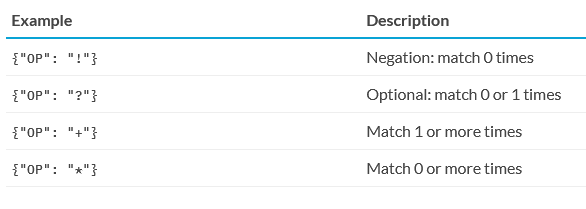

"OP" can have one of four values:

- An "!" negates the token, so it's matched 0 times.

- A "?" makes the token optional, and matches it 0 or 1 times.

- A "+" matches a token 1 or more times.

- And finally, an "*" matches 0 or more times.

Operators can make your patterns a lot more powerful, but they also add more complexity – so use them wisely.
